In [1]:
import pandas as pd
import numpy as np
# custom made functions (can be a pain to import sometimes)
import sys
sys.path.insert(0,os.path.abspath('../src/helper'))
from customPandas import *
#saving the model
import pickle
import random

## Loading the data

In [2]:
# https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
dataPath = os.path.abspath('../data')
fileName = 'ramen-ratings.csv'
df = pd.read_csv(f'{dataPath}/{fileName}') 

## Cleaning some of the data

In [3]:
def cleanStars(value):
    if value == 'Unrated':
        return np.nan
    else:
        return value
df.Stars = df.Stars.apply(cleanStars) 
df[df.Stars == 'Unrated'].Stars

Series([], Name: Stars, dtype: object)

In [4]:
df = df.drop(['Review #','Top Ten'],axis=1)

In [5]:
df = df.fillna(method='ffill')

In [6]:
totalPercentageNullData(df)

,Total,Percent


In [7]:
df.describe()

,Brand,Variety,Style,Country,Stars
count,2580,2580,2580,2580,2580
unique,355,2413,7,38,50
top,Nissin,Chicken,Pack,Japan,4
freq,381,7,1533,352,384


In [8]:
df.groupby(['Stars']).count()

,Brand,Variety,Style,Country
Stars,,,,
0,26,26,26,26
0.1,1,1,1,1
0.25,11,11,11,11
0.5,14,14,14,14
0.75,1,1,1,1
0.9,1,1,1,1
1,26,26,26,26
1.1,2,2,2,2
1.25,10,10,10,10


In [9]:
# changing an incorrect dtype
df = df.astype({'Stars':'float64'})

In [10]:
df.groupby(['Stars']).count()

,Brand,Variety,Style,Country
Stars,,,,
0.000,26,26,26,26
0.100,1,1,1,1
0.250,11,11,11,11
0.500,14,14,14,14
0.750,1,1,1,1
0.900,1,1,1,1
1.000,26,26,26,26
1.100,2,2,2,2
1.250,10,10,10,10


In [24]:
3.75/0.25

15.0

In [31]:
(3.8%0.25) != 0

True

In [35]:
i = 3.8
int(str(i)[0])


3

In [ ]:
def num_list(num):
    return 

In [48]:
test_list = [2, 4, 1, 6]
test_list.index(min(test_list))

2

In [65]:
def make_quartiles(i):
    if (i%0.25) != 0:
        num_list = [int(str(i)[0]), int(str(i)[0]) + 0.25, int(str(i)[0]) + 0.5, int(str(i)[0]) + 0.75, int(str(i)[0]) + 1]
        diff_list = []
        for j in range(len(num_list)):
            diff_list.append(abs(i - num_list[j]))

        new_num = num_list[diff_list.index(min(diff_list))]
    
        return new_num
    
    else:
        return i

In [70]:
df['new_stars'] = df['Stars'].apply(lambda x: make_quartiles(x))

In [71]:
df

,Brand,Variety,Style,Country,Stars,new_stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75,3.75
...,...,...,...,...,...,...
2575,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,3.50
2576,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,1.00
2577,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,2.00
2578,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,2.00


In [73]:
df.groupby(['new_stars']).count()

,Brand,Variety,Style,Country,Stars
new_stars,,,,,
0.00,27,27,27,27,27
0.25,11,11,11,11,11
0.50,14,14,14,14,14
0.75,1,1,1,1,1
1.00,29,29,29,29,29
1.25,10,10,10,10,10
1.50,37,37,37,37,37
1.75,28,28,28,28,28
2.00,70,70,70,70,70


In [60]:
for i in df['Stars']:
    if (i%0.25) != 0:
        num_list = [int(str(i)[0]), int(str(i)[0]) + 0.25, int(str(i)[0]) + 0.5, int(str(i)[0]) + 0.75, int(str(i)[0]) + 1]
        diff_list = []
        for j in range(len(num_list)):
            diff_list.append(abs(i - num_list[j]))

        new_num = num_list[diff_list.index(min(diff_list))]
        #print(new_num)
        #print(f'original: {i}')
        #print('next')
        df['Stars'].replace(i, new_num)
    else:
        


3.75
original: 3.8
next
4.25
original: 4.3
next
2.25
original: 2.3
next
3.25
original: 3.3
next
4.25
original: 4.3
next
3.75
original: 3.8
next
4.25
original: 4.3
next
3.75
original: 3.8
next
4.25
original: 4.3
next
1
original: 1.1
next
2
original: 2.1
next
1
original: 0.9
next
3
original: 3.1
next
4
original: 4.125
next
3
original: 3.125
next
2
original: 2.125
next
3
original: 2.9
next
4
original: 4.125
next
0
original: 0.1
next
2.75
original: 2.8
next
3.75
original: 3.7
next
3.5
original: 3.4
next
3.5
original: 3.6
next
2.75
original: 2.8
next
3
original: 2.9
next
3
original: 3.1
next
1
original: 1.1
next
2.75
original: 2.85
next
2.25
original: 2.3
next
3.25
original: 3.2
next
3.75
original: 3.65
next
1.75
original: 1.8
next


In [62]:
df.groupby(['Stars']).count()

,Brand,Variety,Style,Country
Stars,,,,
0.000,26,26,26,26
0.100,1,1,1,1
0.250,11,11,11,11
0.500,14,14,14,14
0.750,1,1,1,1
0.900,1,1,1,1
1.000,26,26,26,26
1.100,2,2,2,2
1.250,10,10,10,10


In [22]:
df['Stars'][0]

3.75

In [82]:
Y = df['Stars']
df = df.drop(['Stars'],axis=1)

In [12]:
Y_log = np.log(Y + 1)

<AxesSubplot:>

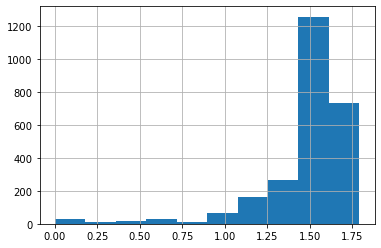

In [13]:
Y_log.hist()

<AxesSubplot:>

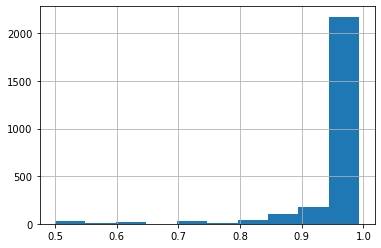

In [14]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

helpful_sigmoid = sigmoid(Y)
helpful_sigmoid.hist()

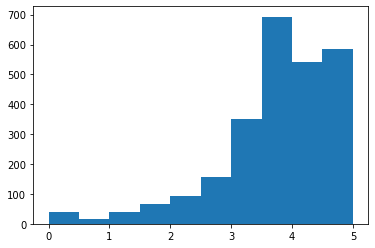

In [15]:
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot

data = exp(Y)
# power transform
data = boxcox(data, 0)
# histogram
pyplot.hist(data)
pyplot.show()

In [16]:
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
print(pt.fit(np.array(Y).reshape(-1,1)))
print(pt.lambdas_)
print(pt.transform(np.array(Y).reshape(-1,1)))


PowerTransformer()
[2.18809268]
[[-0.03609658]
 [-2.12190203]
 [-1.42143668]
 ...
 [-1.59341983]
 [-1.59341983]
 [-2.29474213]]


In [17]:
print(pt.transform(np.array(Y).reshape(-1,1)))

[[-0.03609658]
 [-2.12190203]
 [-1.42143668]
 ...
 [-1.59341983]
 [-1.59341983]
 [-2.29474213]]


In [18]:
bc_Y = pt.transform(np.array(Y).reshape(-1,1))

In [19]:
bc_Y

array([[-0.03609658],
       [-2.12190203],
       [-1.42143668],
       ...,
       [-1.59341983],
       [-1.59341983],
       [-2.29474213]])

In [20]:
from scipy.stats import shapiro
stat, p = shapiro(bc_Y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.956, p=0.000
Sample does not look Gaussian (reject H0)


In [21]:
Y_log.describe()

count    2580.000000
mean        1.504472
std         0.288254
min         0.000000
25%         1.446919
50%         1.558145
75%         1.658228
max         1.791759
Name: Stars, dtype: float64

In [22]:
df[df['Brand'].isin(['Nongshim'])].head()

,Brand,Variety,Style,Country
12,Nongshim,Mr. Bibim Stir-Fried Kimchi Flavor,Pack,South Korea
47,Nongshim,Shin Ramyun Black,Pack,South Korea
57,Nongshim,Budae Jjigae Noodle Soup,Pack,South Korea
76,Nongshim,Shin Ramyun,Pack,South Korea
198,Nongshim,Seaweed Instant Noodle,Cup,South Korea


In [23]:
df.groupby(by=['Brand']).count()

,Variety,Style,Country
Brand,,,
1 To 3 Noodles,1,1,1
7 Select,2,2,2
7 Select/Nissin,1,1,1
A-One,4,4,4
A-Sha Dry Noodle,26,26,26
...,...,...,...
Yum Yum,12,12,12
Yum-Mie,1,1,1
Zow Zow,1,1,1


## Custom Transformers

In [77]:
from nltk.corpus import stopwords
import string
def nltkPreprocess(text):
    """
    Description:
        - Takes a text and cleans it by removing useless punctuations and stopwords
    input:
        -string
    output:
        - list of strings
    """
    # lower
    words = text.lower().split()
    # remove punctiuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    clean = [w for w in stripped if not w in stop_words if len(w)>2]
    return clean 


def cleanVariety(col):
    """
    description:
        - adaptation for 
    """
    cleanCol = list()
    # print(col)
    for v in col:
        # print(type(v))
        cleanCol.append(nltkPreprocess(v[0]))
    return col

In [26]:
# we are trying to make feature engineering part of our pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
#! because the way .fit works in sklearn it passes the arrays as np.array so you must specify
mapper = ColumnTransformer(transformers=[
('Variety', FunctionTransformer(cleanVariety, validate=False),[1])], remainder='passthrough')


## Pipeline

In [27]:
catFeats = df.dtypes[df.dtypes == 'object'].index.tolist()

def catFeat(df):
    return df[catFeats]

keepCat = FunctionTransformer(catFeat)

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('VarietyColNLPClean',mapper),
    ('ohc',OneHotEncoder(handle_unknown='ignore')),
    ('to_dense',ToDenseTransformer()),
    ('pca',PCA())
    ])

In [29]:
# very usefull pipeline visualization
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('VarietyColNLPClean',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variety',
                                                  FunctionTransformer(func=<function cleanVariety at 0x7fbcec94aaf0>),
                                                  [1])])),
                ('ohc', OneHotEncoder(handle_unknown='ignore')),
                ('to_dense',
                 <customPandas.ToDenseTransformer object at 0x7fbced2fbf70>),
                ('pca', PCA())])

## Hyperparameter tuning

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import BayesianRidge, Lasso, Ridge
regressors = [BayesianRidge(),Lasso(), Ridge()]
# hyperparameter tuning for the Randomized Search
params = [{'regressors':[BayesianRidge()],
'regressors__n_iter' : [x for x in np.linspace(start=300,stop =1000,num=8)],
'regressors__alpha_1' : [round(x,2) for x in np.linspace(start=0.01,stop =1,num=8)],
# 'pipeline__pca__n_components': [round(x) for x in np.linspace(start=3,stop = 100,num=8)]
},
{'regressors':[Lasso()],
'regressors__alpha' : [round(x,2) for x in np.linspace(start=0.01,stop =1,num=8)],
# preprocessing pipeline
# 'pipeline__pca__n_components': [round(x) for x in np.linspace(start=3,stop = 100,num=8)]
},

{'regressors':[Ridge()],
'regressors__alpha' : [round(x,2) for x in np.linspace(start=0.01,stop =1,num=8)],
# preprocessing pipeline
# 'pipeline__pca__n_components':[round(x) for x in np.linspace(start=3,stop = 100,num=8)]
}]
# if looking for specific parameters use the get_params methods (e.g.Lasso().get_params())

In [31]:
# preprocessor.get_params()

In [81]:
from sklearn.model_selection import train_test_split
# split of the datasla
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.33, random_state=42)

NameError: name 'Y' is not defined

In [33]:
baseModel = Pipeline([('categories', pipeline),
                      ('regressors', regressors[0])])
baseModel

Pipeline(steps=[('categories',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(fill_value='missing',
                                                strategy='constant')),
                                 ('VarietyColNLPClean',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('Variety',
                                                                   FunctionTransformer(func=<function cleanVariety at 0x7fbcec94aaf0>),
                                                                   [1])])),
                                 ('ohc',
                                  OneHotEncoder(handle_unknown='ignore')),
                                 ('to_dense',
                                  <customPandas.ToDenseTransformer object at 0x7fbced2fbf70>),
                                 ('pca', PCA())])),
                ('regressors', BayesianRidge())])

In [34]:
pipeline['pca'].get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [35]:
tunedModel = RandomizedSearchCV(baseModel,params,verbose=1,n_iter=150, cv=5,random_state=42).fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
print("model score training data: %.3f" % tunedModel.score(X_train, y_train)) 
print("model score test data: %.3f" % tunedModel.score(X_test, y_test))
print(tunedModel.best_estimator_.get_params)
tunedModel.best_params_

In [ ]:
y_pred = tunedModel.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_test,y_pred)

In [ ]:
sns.histplot([y_test,y_pred]);

In [74]:
modelPath = os.path.abspath('../src/models/')
modelPath

'/Users/zumiis/ramenML/src/models'

In [78]:
# save the model to disk
filename = 'veryBasicModelMK1.sav'
pickle.dump(tunedModel, open(f'{modelPath}/{filename}', 'wb'))

NameError: name 'tunedModel' is not defined

In [79]:
# load the model from disk
loaded_model = pickle.load(open(f'{modelPath}/{filename}', 'rb'))

In [80]:
y_pred = loaded_model.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
sns.histplot([y_test,y_pred]);

In [ ]:
newRandoData ={ 
    'Brand':'Master Kong',
    'Variety':'Onion Soy sauce sour kimchi prawn ramyun',
    'Style':'cup',
    'Country': 'Japan'
}
newSeries = pd.Series(newRandoData)

In [ ]:
def randomNoods():
    nood = [random.choice(df[i]) for i in df.columns.to_list()]
    print(nood)
    return nood

In [ ]:
loaded_model.predict([newSeries])

In [ ]:
loaded_model.predict([randomNoods()])